In [49]:
###-----------------
### Import Libraries
###-----------------
import sys


sys.path.append('../')
 

import os
import gc
import time
import numpy as np
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt

import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Global variables
inpDir = '../input' # Input Stored here
outDir = '../ouput' # output Here
modelDir = './models'# to save Models
subDir = 'fifa_2019' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)



BATCH_SIZE = 64
TEST_SIZE = 0.2
NOISE = 0.2 
ALPHA = 0.001 
EPOCHS = 50 

In [52]:
#set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


$$\text{
    Defining Data
}$$

In [53]:
start = -2.1
end = 2.1
delta = 0.0005

# Train
X_train = np.arange(start,end+delta, delta)
y_rnd = np.random.rand(X_train.shape[0])- 0.5   # Noise
y_true = 2*np.square(X_train)+2*np.sin(np.pi*X_train)
y_train = y_rnd + y_true


# Test
X_test = np.arange(start,end+delta, delta*10)
y_rnd = np.random.rand(X_test.shape[0])- 0.5   # Noise
y_true_test = 2*np.square(X_test)+2*np.sin(np.pi*X_test)
y_test = y_rnd + y_true_test
 

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8401,), (8401,), (841,), (841,))

In [55]:
8401/BATCH_SIZE

131.265625

In [56]:
num_sample = int(X_train.shape[0]*BATCH_SIZE)

# Train Sample
X_train = X_train[:num_sample]
y_train = y_train[:num_sample]
y_true = y_true[:num_sample]

# Test Sample
X_test = X_test[:num_sample]
y_test = y_test[:num_sample]

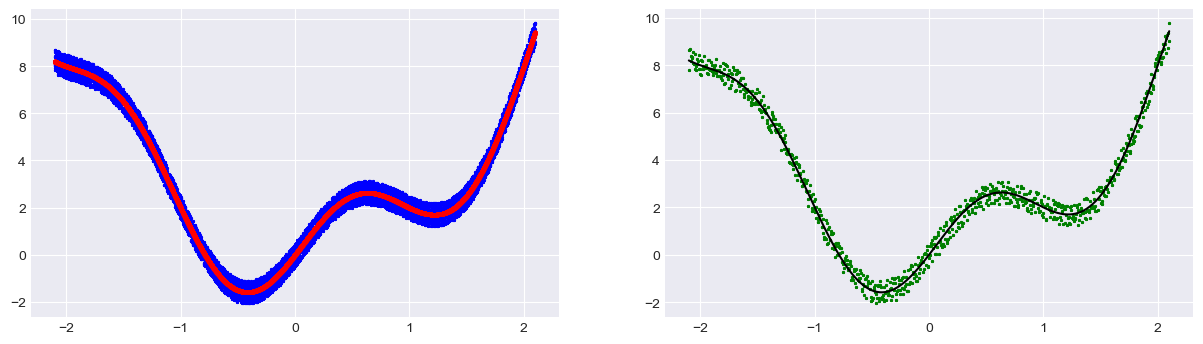

In [57]:
fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize=2, label='Train')
ax.plot(X_train, y_true, 'r*', markersize=3, label='Train')

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize=2, label='Test')
ax.plot(X_test, y_true_test, 'k', markersize=2, label='Test')
plt.show()

$$\text{
    Creating the model
}
$$

In [58]:
# Input
inputs = tf.keras.Input(
    shape=(1,), 
    name='input'
)

# Hidden Layer
x = tf.keras.layers.Dense(
    128, 
    activation=tf.keras.activations.relu, 
    name='fc_1'
)(inputs)

x = tf.keras.layers.Dense(
    64, 
    activation=tf.keras.activations.relu, 
    name='fc_2'
)(x)

# Output 
outputs = tf.keras.layers.Dense(
    1, 
    name='output'
)(x)

                                

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [59]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Compiling the model
}
$$

In [ ]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics = ['mae'],
)

$$\text{
    Fitting the model
}
$$

In [61]:
history = model.fit(
    x=X_train,
    y=y_train, 
    validation_data = [X_test, y_true_test],
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10.6327 - mae: 2.4957 - val_loss: 2.4572 - val_mae: 1.3150
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0127 - mae: 1.1740 - val_loss: 0.9585 - val_mae: 0.7517
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9966 - mae: 0.7534 - val_loss: 0.8527 - val_mae: 0.6406
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9105 - mae: 0.6988 - val_loss: 0.7713 - val_mae: 0.6071
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8094 - mae: 0.6609 - val_loss: 0.6342 - val_mae: 0.5495
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6603 - mae: 0.6010 - val_loss: 0.4544 - val_mae: 0.4588
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4749 - mae: 0.5174 - val_loss: 0.2695 - val_mae: 0.3440
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3142 - mae: 0.4303 - val_loss: 0.1432 - val_mae: 0.2471
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,loss,mae,val_loss,val_mae
0,6.475044,1.945415,2.457204,1.315009
1,1.602583,1.029504,0.958459,0.751709
2,0.966438,0.730404,0.852744,0.640644


,loss,mae,val_loss,val_mae
47,0.089303,0.256497,0.006601,0.062467
48,0.089281,0.256469,0.006607,0.062531
49,0.089248,0.256415,0.006522,0.061918


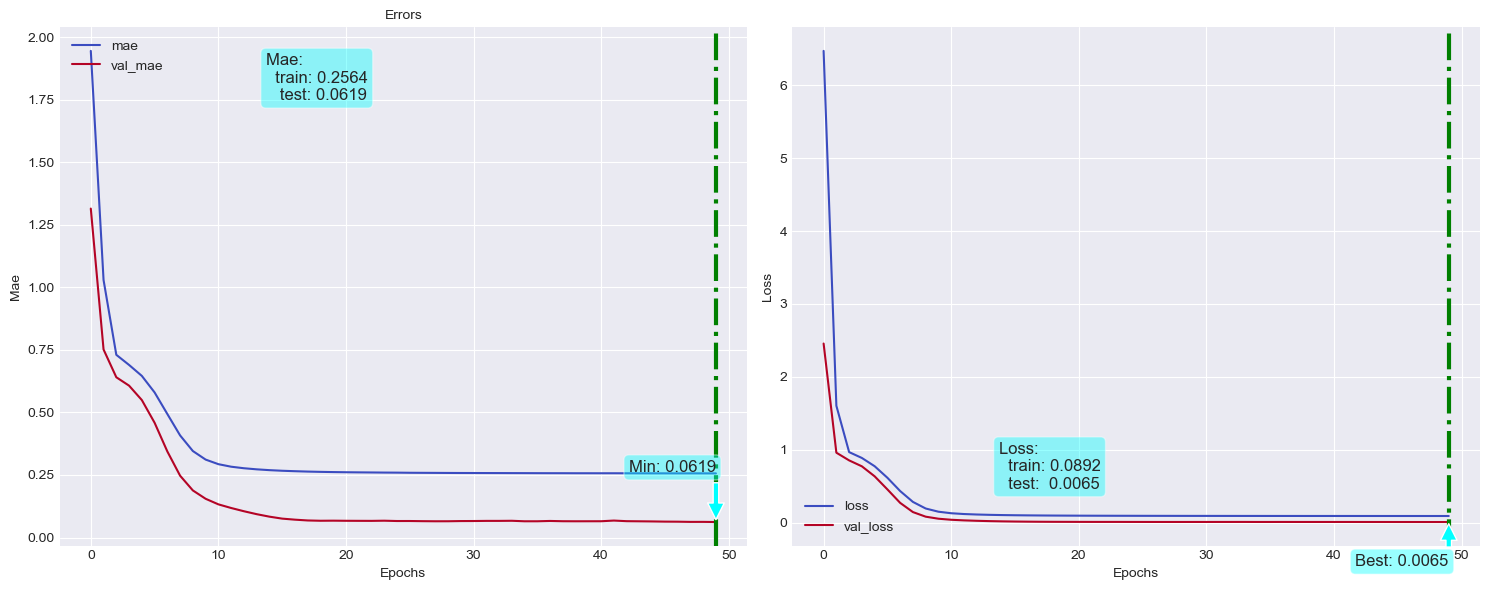

In [62]:
from utils.helper import fn_plot_tf_hist


hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

In [63]:
y_pred = model.predict(X_test)

result_df = pd.DataFrame({
    'test':y_test,
    'pred':y_pred[:,0],
})

result_df['true']= y_true_test
result_df.head()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,test,pred,true
0,7.792714,8.322505,8.201966
1,8.633752,8.311446,8.189969
2,8.677438,8.300386,8.178218
3,8.183650,8.289329,8.166704
4,8.382352,8.278269,8.155420


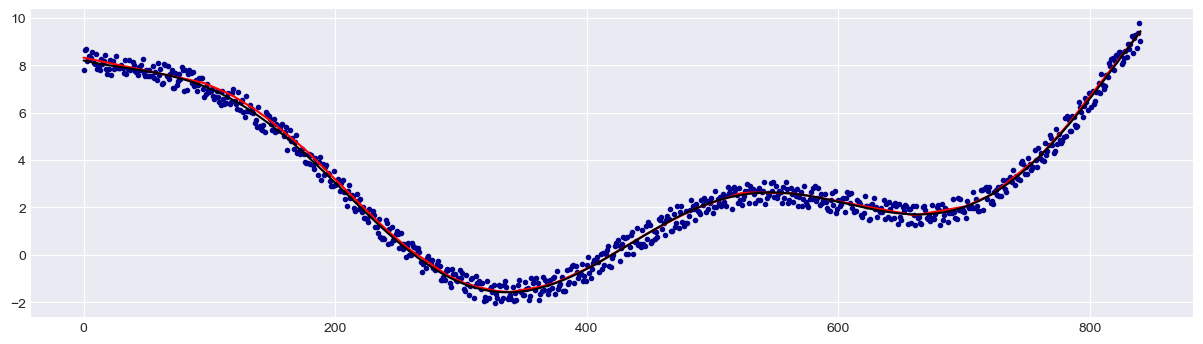

In [64]:
ax = result_df.pred.plot(c='r', label='pred')
result_df.true.plot(c='k', label='true')

plt.scatter(result_df.index, result_df.test,c='DarkBlue', marker='.')